<a href="https://colab.research.google.com/github/CJL810/MNIST-NN/blob/master/MNIST_ConvolutionalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

In [0]:
np.random.seed(0)

(60000, 28, 28)
(10000, 28, 28)


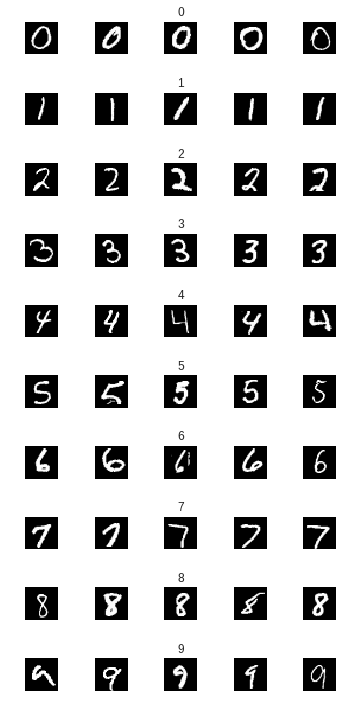

In [21]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


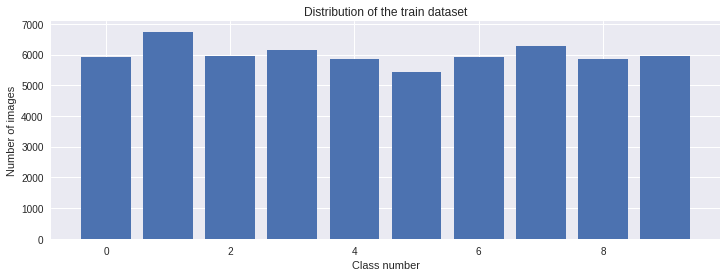

In [22]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
# adding depth to data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
# define the leNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))     # 2x2 pooling size
  model.add(Conv2D(15, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [26]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
___________________________

In [27]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2482 - acc: 0.9195 - val_loss: 0.0464 - val_acc: 0.9873
Epoch 2/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0701 - acc: 0.9782 - val_loss: 0.0368 - val_acc: 0.9885
Epoch 3/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0571 - acc: 0.9821 - val_loss: 0.0437 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0430 - acc: 0.9866 - val_loss: 0.0416 - val_acc: 0.9873
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0353 - val_acc: 0.9893
Epoch 7/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0396 - acc: 0.9879 - val_loss: 0.0389 - val_acc:

Text(0.5, 0, 'epoch')

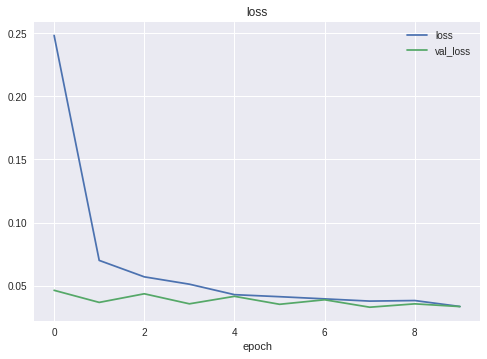

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

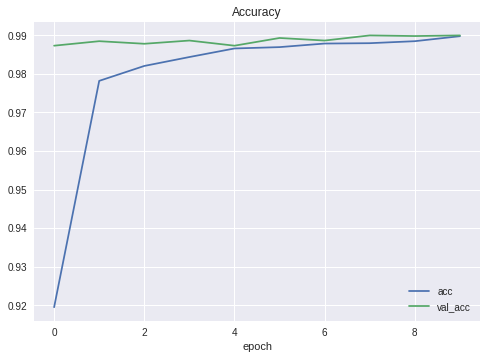

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

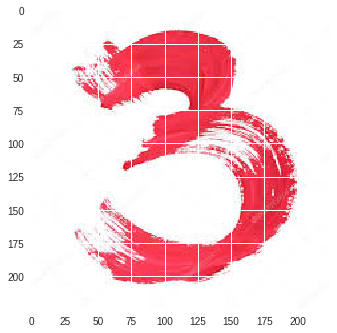

In [30]:
# using a hand written image on the web to test model
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

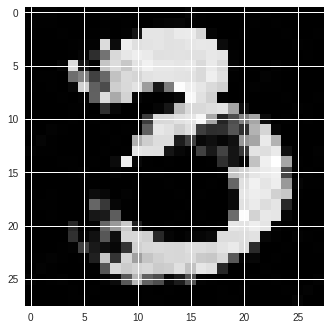

In [31]:
# preparing image for model
import cv2

img_array = np.asarray(img)      # turning image into a numpy array
resized = cv2.resize(img_array, (28, 28))   # resizing image
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)   # converting to gray scale
image = cv2.bitwise_not(gray_scale)   # converting background to black and number color to white
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [0]:
# normalizing image
image = image /255
image = image.reshape(1, 28, 28, 1)

In [33]:
prediction = model.predict_classes(image)
print('Predicted digit:', str(prediction))

Predicted digit: [3]


In [34]:
score = model.evaluate(X_test, y_test, verbose = 0)  
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.03408426739622346
Test accuracy: 0.9905


In [41]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)     #using 1st layer of model for inputs and outputs
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)     #using 2nd pooling layer as output

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)   # contains 30 outputs 1 for each filter of dim of 24x24
print(visual_layer2.shape)   # contains 15 outputs 1 for each filter of dim of 10x10

(1, 24, 24, 30)
(1, 10, 10, 15)


# **Showing what each filters learning about the image**

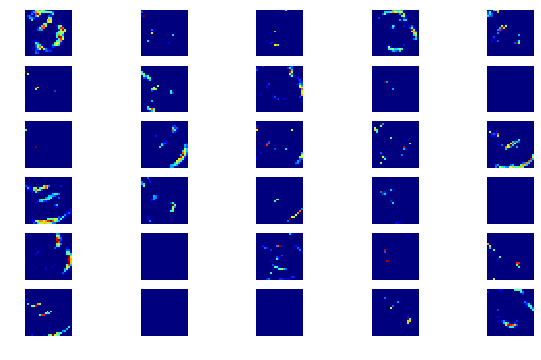

In [42]:
plt.figure(figsize = (10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')

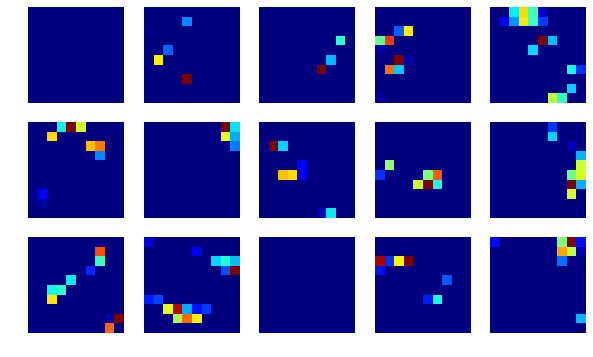

In [43]:
plt.figure(figsize = (10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')